# EC7212 – Computer Vision and Image Processing

## Take Home Assignment 1

## EG/2020/4330 - Sheshan K.H.N.

#### [GitHub Repository]()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

Path("../results").mkdir(parents=True, exist_ok=True)

## Task 1: Reducing Image Intencity

In [3]:
def quantize_intensity(image, target_levels):
    
    # Validate input
    if target_levels <= 0 or (target_levels & (target_levels - 1)) != 0:
        raise ValueError("Target levels must be a positive power of 2")
    
    if target_levels > 256:
        raise ValueError("Target levels cannot exceed 256")
    
    # Calculate quantization factor
    quantization_factor = 256 // target_levels
    
    # Perform quantization
    quantized_image = (image // quantization_factor) * quantization_factor
    
    return quantized_image.astype(np.uint8)

In [4]:
def reduce_intensity_levels(image, levels):
    if not (levels & (levels - 1) == 0 and levels <= 256):
        raise ValueError("Levels must be a power of 2 and ≤ 256")

    # Compute the quantization step
    step = 256 // levels
    reduced_img = (image // step) * step

    return reduced_img

In [5]:
# Load and process image
image_file = "../image/grey_image.jpg"
input_image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if input_image is None:
    print(f"Error: Could not load image from {image_file}")
    exit(1)

In [6]:
# Test with different intensity levels
intensity_levels = [2, 8]
results = []

for levels in intensity_levels:
    quantized = quantize_intensity(input_image, levels)
    results.append((levels, quantized))
    
    # Save individual results
    save_path = f"../results/quantized_{levels}_levels.jpg"
    cv2.imwrite(save_path, quantized)

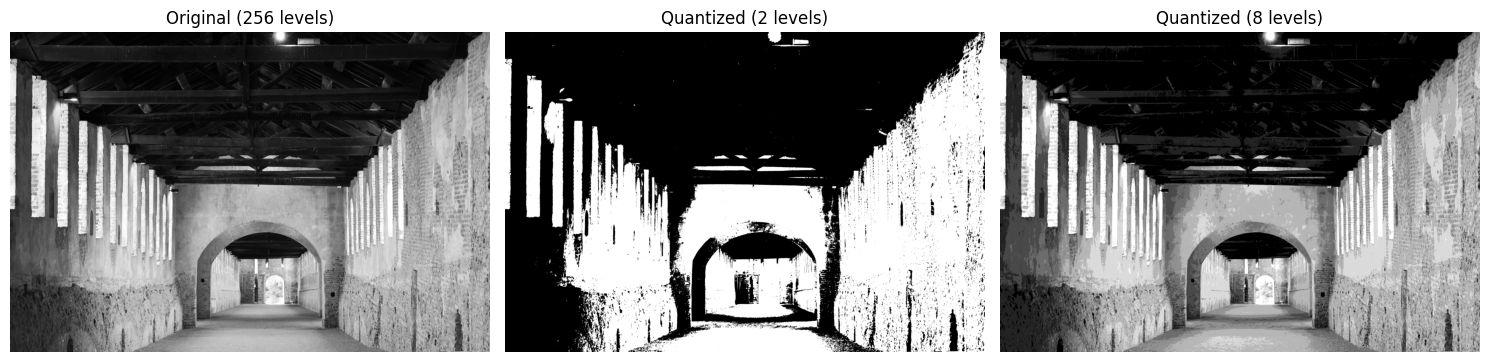

In [7]:
# Create comparison visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes = axes.flatten()

# Original image
axes[0].imshow(input_image, cmap='gray')
axes[0].set_title('Original (256 levels)')
axes[0].axis('off')

# Quantized images
for i, (levels, img) in enumerate(results):
    axes[i+1].imshow(img, cmap='gray')
    axes[i+1].set_title(f'Quantized ({levels} levels)')
    axes[i+1].axis('off')

plt.tight_layout()
plt.savefig('../results/intensity_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Task 2: Spatial Average

In [8]:
def apply_averaginging_filter(image, kernel_size):
    
    # Create averaging kernel
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    
    # Apply convolution
    smoothed = cv2.filter2D(image, -1, kernel)
    
    return smoothed.astype(np.uint8)

In [9]:
kernel_sizes = [3, 10, 20]
averaged_images = []

print("Applying spatial averaging filters...")
for size in kernel_sizes:
    averaged = apply_averaginging_filter(input_image, size)
    averaged_images.append(averaged)
    
    # Save result
    output_file = f"../results/averaged_{size}x{size}.jpg"
    cv2.imwrite(output_file, averaged)
    print(f"Saved {size}×{size} averaged image")

Applying spatial averaging filters...
Saved 3×3 averaged image
Saved 10×10 averaged image
Saved 20×20 averaged image


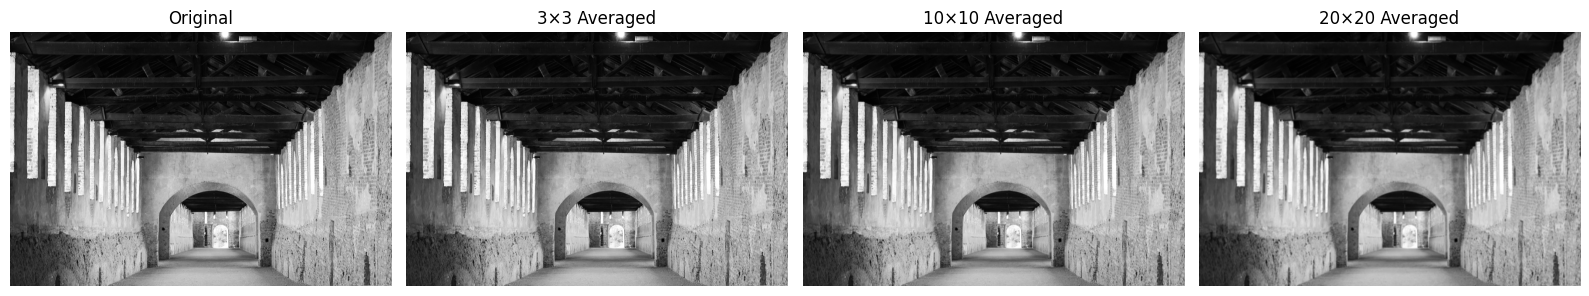

In [10]:
# Visualization
plt.figure(figsize=(16, 4))
images_to_show = [input_image] + averaged_images
titles = ['Original'] + [f'{size}×{size} Averaged' for size in kernel_sizes]

for i, (img, title) in enumerate(zip(images_to_show, titles)):
    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.savefig('../results/averaging_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Task 3: Image Rotation

#### Rotate by 45 degrees

In [11]:
# Shape of image in terms of pixels.
(rows, cols) = input_image.shape[:2]

M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
angled_img = cv2.warpAffine(input_image, M, (cols, rows))


In [12]:
output_path = os.path.join("..", "results", "45_rotated_img.jpg")
cv2.imwrite(output_path, angled_img)

True

#### Rotate by 90 degrees

In [13]:
rotated_img = cv2.rotate(input_image, cv2.ROTATE_90_CLOCKWISE)
output_path = os.path.join("..", "results", "90_rotated_img.jpg")
cv2.imwrite(output_path, rotated_img)

True

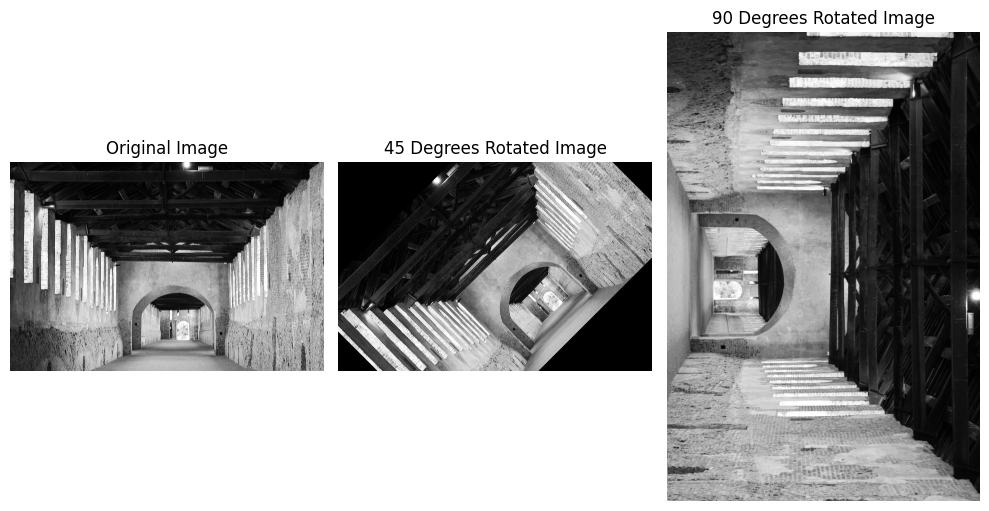

In [14]:
# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(angled_img, cmap='gray')
plt.title(f'45 Degrees Rotated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rotated_img, cmap='gray')
plt.title(f'90 Degrees Rotated Image')
plt.axis('off')

plt.tight_layout()
plt.show()


## Task 4: Spatial Resolution Reduction

In [66]:
def reduce_resolution_blocks(image, block_size):
    
    height, width = image.shape
    output_image = image.copy().astype(np.float32)
    
    for row in range(0, height, block_size):
        for col in range(0, width, block_size):
            block = image[row:row+block_size, col:col+block_size]
            block_mean = np.mean(block)
            output_image[row:row+block_size, col:col+block_size] = block_mean
    
    return output_image.astype(np.uint8)

In [67]:
# Define block sizes and process images
block_sizes = [3, 5, 7]
downsampled_images = []

for block_size in block_sizes:
    reduced_img = reduce_resolution_blocks(input_image, block_size)
    downsampled_images.append(reduced_img)
    
    # Calculate compression ratio
    original_blocks = input_image.size
    reduced_blocks = (input_image.shape[0] // block_size) * (input_image.shape[1] // block_size)
    compression_ratio = original_blocks / (reduced_blocks * block_size**2)
    
    # Save result
    cv2.imwrite(f"../results/block_averaged_{block_size}x{block_size}.jpg", reduced_img)
    print(f"{block_size}x{block_size} block averaged image saved (Compression: {compression_ratio:.2f}x)")


3x3 block averaged image saved (Compression: 1.00x)
5x5 block averaged image saved (Compression: 1.00x)
7x7 block averaged image saved (Compression: 1.00x)


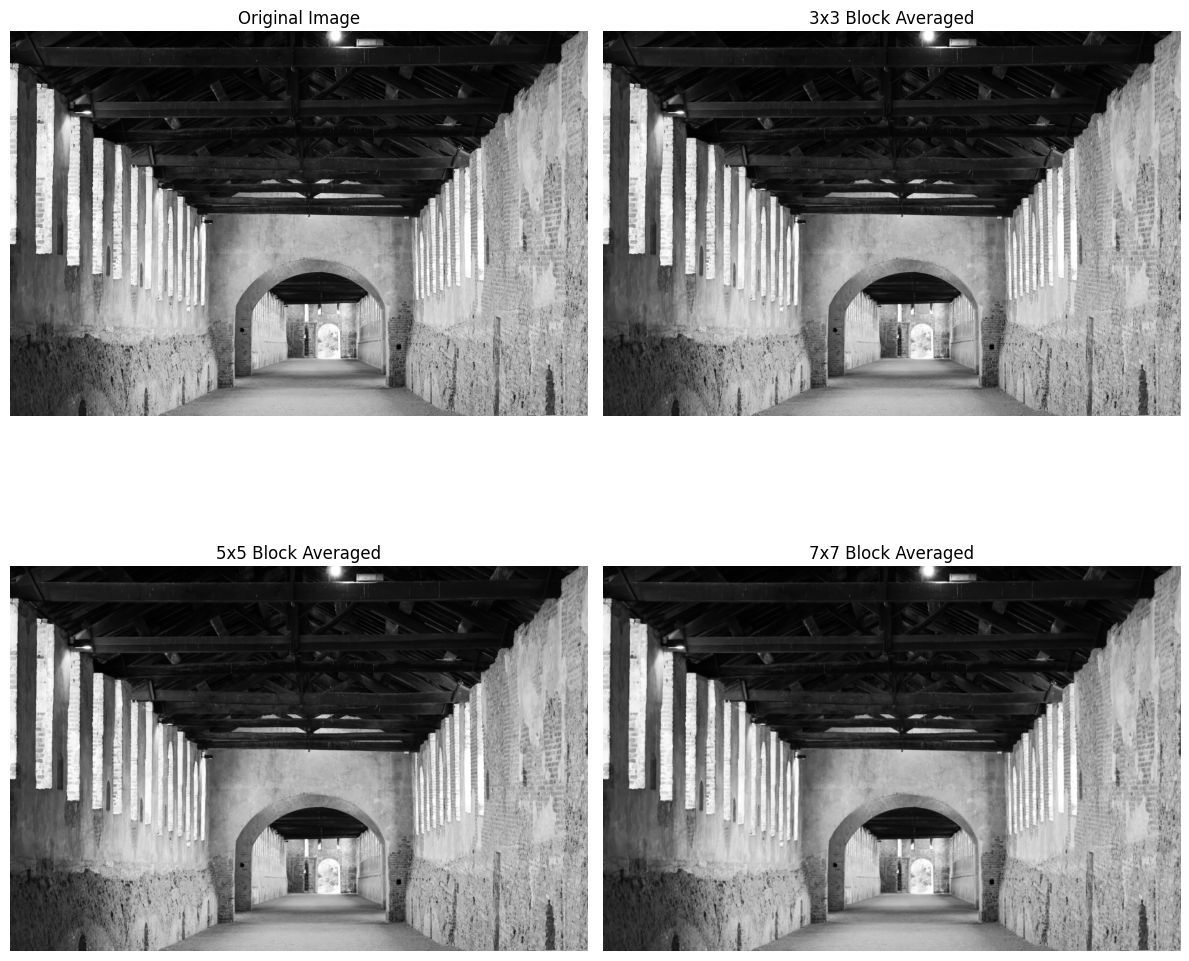

In [68]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

axes[0].imshow(input_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, (img, size) in enumerate(zip(downsampled_images, block_sizes)):
    axes[i+1].imshow(img, cmap='gray')
    axes[i+1].set_title(f'{size}x{size} Block Averaged')
    axes[i+1].axis('off')

plt.tight_layout()
plt.savefig('../results/block_averaging_comparison.png', dpi=300)
plt.show()
